In [66]:
%%capture
%load_ext google.cloud.bigquery

In [94]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore', category=UserWarning)

In [61]:
# cell has tag: "parameters", default if not provided
start_date = "2017-07-01"
end_date = "2020-01-01"

In [62]:
params = {
    "start_date": start_date, 
    "end_date": end_date
}
print("Including rides between {} and {}".format(start_date, end_date))

Including rides between 2017-07-01 and 2020-01-01


In [98]:
%%bigquery sf_stations --params $params
SELECT
    TIMESTAMP_TRUNC(trips.start_date, DAY) AS start_day,
    stations.station_id,
    stations.name,
    stations.lat,
    stations.lon,
    COUNT(*) as trip_count
FROM
    `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips` as trips
JOIN 
    `bigquery-public-data.san_francisco_bikeshare.bikeshare_station_info` as stations 
ON 
    trips.start_station_id = stations.station_id
WHERE
    stations.lat BETWEEN 37.7 AND 38.5 AND 
    stations.lon BETWEEN -122.5 AND -122.35 AND
    trips.start_date BETWEEN TIMESTAMP( @start_date ) AND TIMESTAMP( @end_date )
GROUP BY
    1,2,3,4,5

## Top 10 Stations

In [99]:
sf_stations.groupby(['name']).agg(trip_count=pd.NamedAgg('trip_count','sum')).sort_values('trip_count',ascending=False).head(10)

,trip_count
name,
San Francisco Ferry Building (Harry Bridges Plaza),24887
San Francisco Caltrain (Townsend St at 4th St),22095
The Embarcadero at Sansome St,21831
Market St at 10th St,20761
Berry St at 4th St,19875
Montgomery St BART Station (Market St at 2nd St),18824
Powell St BART Station (Market St at 4th St),17591
Howard St at Beale St,16700
Steuart St at Market St,16241


## Trip Trends

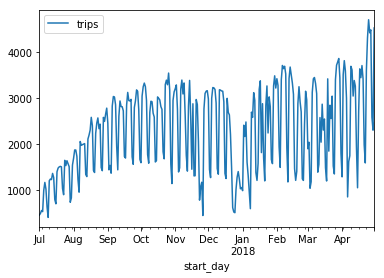

In [103]:
sf_stations.groupby(['start_day']).agg(trips=pd.NamedAgg('trip_count','sum')).plot.line()